Load libraries and set up environment

In [1]:
import sympy
sympy.init_printing()
from sympy.physics.units import kelvin, cm, second, gram, kelvin, speed_of_light, boltzmann, kilogram, meter
import scipy.constants
erg = gram*(cm/second)**2

In this notebook we calculate the cooling time of the solar corona. The typical temperature is $10^7 \, \rm K$ and the typical density is $10^{15} \, \rm cm^{-3}$ (according to the [Wikipedia entry](https://en.wikipedia.org/wiki/Corona)). The energy density is given by

In [2]:
n = sympy.Symbol('n', positive=True) # Number density
k = sympy.Symbol('k', positive=True) # Boltzmann constant
T = sympy.Symbol('T', positive=True) # Temperature
energy_density = n*k*T
energy_density

Assuming Bremsstrahlung is the dominant emission mechanism, the emissivity is given by

In [3]:
alpha = sympy.Symbol('alpha', positive=True) # Fine structure constant
m_e = sympy.Symbol('m_e', positive=True) # Electron mass
c = sympy.Symbol('c', positive=True) # Speed of light
r_e = sympy.Symbol('r_e', positive=True) # Classical electron radius
bs_emissivity = alpha*(m_e*c**2/(r_e**3*(r_e/c)))*(n*r_e**3)**2*sympy.sqrt(k*T/m_e/c**2)
bs_emissivity

Finally, the cooling time is given by

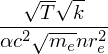

In [4]:
cooling_time = (energy_density/ bs_emissivity).simplify()
cooling_time

Substituting numbers

In [5]:
cooling_time.subs({
    T: 1e10*kelvin,
    k: boltzmann.convert_to(erg/kelvin),
    c: speed_of_light.convert_to(cm/second),
    n: 1e15/cm**3,
    r_e: scipy.constants.physical_constants['classical electron radius'][0]*meter.convert_to(cm),
    m_e: scipy.constants.electron_mass*kilogram.convert_to(gram),
    alpha: scipy.constants.alpha
})

So the timescale is of the order of a minute